In [14]:
import pymaid
import navis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from statannot import add_stat_annotation

from matplotlib.ticker import PercentFormatter

In [15]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"07805af64adbbec1e41a019d6974284e8a1081d7")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [16]:
#initialize an empty dataframe
glomcontrol=pd.DataFrame(columns=['glomerulus','id', 'path length in glom', 'total recurrent connections', 'recurrent connections in glom', 'recurrent connections density'])


In [17]:
#fetch a group of neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)

Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

In [18]:
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD1neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD1 04/06/21')
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':connect, 'recurrent connections in glom':glomconnect, 'recurrent connections density':control}, ignore_index=True)

453680.44


Regenerating:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


434659.94


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6


Regenerating:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.0


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.06


Regenerating:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529873.44


Regenerating:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284735.88


Regenerating:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


629597.1


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

In [19]:
print(glomcontrol)

   glomerulus      id  path length in glom  \
0         md1    7172          453680.4375   
1         md1    7815          406781.8125   
2         md1    1608          434659.9375   
3         md1     873          569447.6250   
4         md1    6736          445835.0000   
5         md1     881          506129.0000   
6         md1    6975          391274.0625   
7         md1  324409          416095.0000   
8         md1     953          529873.4375   
9         md1    5021          284735.8750   
10        md1     671          629597.1250   

               total recurrent connections  \
0    [1, 6, 10, 5, 7, 9, 27, 5, 10, 9, 14]   
1        [3, 3, 4, 9, 5, 6, 0, 7, 8, 7, 3]   
2     [16, 0, 0, 2, 0, 10, 4, 2, 14, 1, 6]   
3      [7, 5, 3, 1, 7, 17, 3, 7, 15, 2, 4]   
4        [9, 9, 4, 7, 0, 6, 2, 6, 7, 4, 6]   
5    [11, 9, 11, 15, 2, 0, 7, 7, 3, 3, 17]   
6     [27, 2, 5, 2, 3, 6, 2, 12, 13, 8, 7]   
7    [12, 4, 3, 8, 3, 13, 12, 0, 6, 5, 14]   
8     [12, 8, 9, 17, 10, 2, 8, 4,

In [20]:
#fetch a group of neurons
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2neurons = pymaid.get_neuron(MD2OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [21]:
for n in MD2neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD2neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD2neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':connect, 'recurrent connections in glom':glomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


204651.9


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


141502.66


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138635.31


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


152818.12


Regenerating:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167905.39


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


140428.69


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


102887.84


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


195558.47


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


164012.03


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167272.22


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
#fetch a group of neurons
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3neurons = pymaid.get_neuron(MD3OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
for n in MD3neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD3neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD3neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= sumglomconnect/dlength
    glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':connect, 'recurrent connections in glom':glomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


170239.52


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


150266.17


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


155520.5


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


188368.45


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


133553.28


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


137935.19


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


108313.91


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


143647.62


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


107448.98


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


122648.234


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

In [24]:
df=glomcontrol

md1=df[df["glomerulus"]=="md1"]
md2=df[df["glomerulus"]=="md2"]
md3=df[df['glomerulus']=="md3"]
md2.head()

,glomerulus,id,path length in glom,total recurrent connections,recurrent connections in glom,recurrent connections density
11,md2,9064,204651.906250,"[0, 2, 0, 1, 0, 2, 1, 0, 2, 2]","[0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, ...",0.000049
12,md2,7209,141502.656250,"[2, 0, 0, 1, 0, 6, 0, 0, 4, 2]","[2.0, 0.0, 0.0, 1.0, 0.0, 6.0, 0.0, 0.0, 4.0, ...",0.000106
13,md2,718,138635.312500,"[2, 0, 0, 0, 2, 4, 0, 5, 3, 0]","[2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 5.0, 3.0, ...",0.000115
14,md2,7983,152818.125000,"[1, 0, 0, 0, 6, 0, 0, 0, 2, 0]","[1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 2.0, ...",0.000059
15,md2,947,167905.390625,"[2, 0, 2, 6, 0, 2, 0, 0, 4, 0]","[2.0, 0.0, 2.0, 6.0, 0.0, 2.0, 0.0, 0.0, 4.0, ...",0.000095


In [25]:
#convert to lists
md1_recurrent_inglom=md1["recurrent connections in glom"].values.tolist()
md1_recurrent_inglom=list(np.concatenate(md1_recurrent_inglom))

md2_recurrent_inglom=md2["recurrent connections in glom"].values.tolist()
md2_recurrent_inglom=list(np.concatenate(md2_recurrent_inglom))

md3_recurrent_inglom=md3["recurrent connections in glom"].values.tolist()
md3_recurrent_inglom=list(np.concatenate(md3_recurrent_inglom))

print(md2_recurrent_inglom)

[0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 6.0, 0.0, 0.0, 4.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 5.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 6.0, 0.0, 2.0, 0.0, 0.0, 4.0, 0.0, 2.0, 3.0, 2.0, 0.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 6.0, 1.0, 5.0, 1.0, 0.0, 4.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 0.0]


In [26]:
data_dict = {"1": md1_recurrent_inglom_sum, "2": md2_recurrent_inglom_sum, "3": md3_recurrent_inglom_sum}
data_dict


NameError: name 'md1_recurrent_inglom_sum' is not defined

In [ ]:
pre_df = {"Glomerulus": [], "OSN → OSN synapses in glomerulus": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses in glomerulus"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
data_dict

In [ ]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

In [ ]:
#kruskal-wallis test
stats.kruskal(md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom)

KruskalResult(statistic=114.08963155191407, pvalue=1.6817106995938968e-25)

In [ ]:
#posthocs
sp.posthoc_dunn([md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom], p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,5.603106e-24,1.439592e-14
2,5.603106e-24,1.000000e+00,5.282931e-02
3,1.439592e-14,5.282931e-02,1.000000e+00


In [ ]:
#make lists like a noob
md1_recurrent_density=md1["recurrent connections density"].values.tolist()
md2_recurrent_density=md2["recurrent connections density"].values.tolist()
md3_recurrent_density=md3["recurrent connections density"].values.tolist()

#put them in a dataframe

In [ ]:
data_dict = {"MD1": md1_recurrent_density, "MD2": md2_recurrent_density, "MD3": md3_recurrent_density}
pre_df = {"Glomerulus": [], "OSN → OSN synapses density (synapses/µm)": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses density (synapses/µm)"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses density (synapses/µm)
0,MD1,0.000205
1,MD1,0.000125
2,MD1,0.000118
3,MD1,0.000123
4,MD1,0.000140
5,MD1,0.000210
6,MD1,0.000185
7,MD1,0.000127
8,MD1,0.000140
9,MD1,0.000113


MD1 v.s. MD2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.480e-04 U_stat=1.000e+02
MD2 v.s. MD3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.024e-03 U_stat=6.000e+00
MD1 v.s. MD3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.000e+01


/tmp/ipykernel_33122/2465566235.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


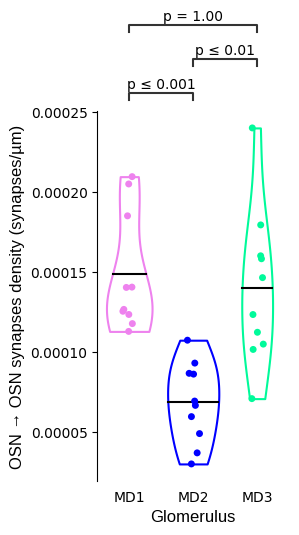

In [ ]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → OSN synapses density (synapses/µm)"
order = ['MD1', 'MD2', 'MD3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('OSN → OSN synapses density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_aspect(25000)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("MD1", "MD2"), ("MD1", "MD3"), ("MD2", "MD3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrentdensity.svg', format="svg")
plt.show()

In [ ]:
stats.kruskal(md1_recurrent_density, md2_recurrent_density, md3_recurrent_density)


KruskalResult(statistic=17.53806451612904, pvalue=0.000155473966547086)

In [ ]:
#posthocs
sp.posthoc_dunn([md1_recurrent_density, md2_recurrent_density, md3_recurrent_density], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000275,1.000000
2,0.000275,1.000000,0.003448
3,1.000000,0.003448,1.000000
